In [1]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import yfinance as yf
import matplotlib.pyplot as plt

In [28]:
stock_names=['SPY','META']
end_date=datetime.today()
n_years=4
start_date=end_date-timedelta(days=n_years*365)

stock_date=yf.download(tickers=stock_names,start=start_date,end=end_date)
stock_prices=stock_date['Adj Close']
df=pd.concat([stock_prices['SPY'],stock_prices['META']],axis=1)
df.columns=['SPY','META']
df

[*********************100%***********************]  2 of 2 completed


,SPY,META
Date,,
2019-06-20,275.935760,189.529999
2019-06-21,275.534668,191.139999
2019-06-24,275.197266,192.600006
2019-06-25,272.498199,188.839996
2019-06-26,272.226410,187.660004
...,...,...
2023-06-12,432.194550,271.049988
2023-06-13,435.043976,271.320007
2023-06-14,435.562042,273.350006


In [29]:
from statsmodels.api import OLS
model=OLS(df.SPY.iloc[:90],df.META.iloc[:90])
model=model.fit()
df['spread']=df.SPY-model.params[0]*df.META

In [30]:
#Moving parameters
rolling_windows_days=30
df['moving_average']=df.spread.rolling(rolling_windows_days).mean()
df['moving_std_dev']=df.spread.rolling(rolling_windows_days).std()

In [31]:
df['upper_band']=df.moving_average+2*df.moving_std_dev
df['lower_band']=df.moving_average-2*df.moving_std_dev

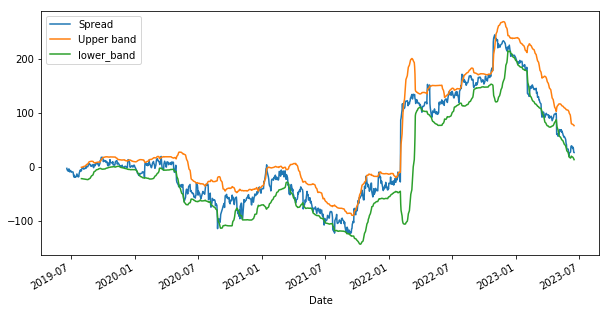

In [32]:
df.spread.plot(label='Spread',figsize=(10,5))
df.upper_band.plot(label='Upper band')
df.lower_band.plot(label='lower_band')
plt.legend()
plt.show()

In [33]:
#Long Positions
df['Long_entry']=df.spread < df.lower_band
df['Long_exit']=df.spread >= df.lower_band
df['positions_long']=np.nan
df.loc[df.Long_entry,'positions_long']=1
df.loc[df.Long_exit,'positions_long']=0
df.positions_long=df.positions_long.fillna(method='ffill')
df

,SPY,META,spread,moving_average,moving_std_dev,upper_band,lower_band,Long_entry,Long_exit,positions_long
Date,,,,,,,,,,
2019-06-20,275.935760,189.529999,-2.132205,NaN,NaN,NaN,NaN,False,False,NaN
2019-06-21,275.534668,191.139999,-4.895402,NaN,NaN,NaN,NaN,False,False,NaN
2019-06-24,275.197266,192.600006,-7.374846,NaN,NaN,NaN,NaN,False,False,NaN
2019-06-25,272.498199,188.839996,-4.557433,NaN,NaN,NaN,NaN,False,False,NaN
2019-06-26,272.226410,187.660004,-3.098002,NaN,NaN,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-12,432.194550,271.049988,34.524950,49.034878,15.155260,79.345397,18.724359,False,True,0.0
2023-06-13,435.043976,271.320007,36.978218,48.361086,15.229259,78.819604,17.902567,False,True,0.0
2023-06-14,435.562042,273.350006,34.517982,47.567692,15.312324,78.192341,16.943043,False,True,0.0


In [34]:
#Short positions
df['short_entry']=df.spread>df.upper_band
df['short_exit']=df.spread<=df.upper_band
df['positions_short']=np.nan
df.loc[df.short_entry,'positions_short']=-1
df.loc[df.short_exit,'positions_short']=0
df.positions_short=df.positions_short.fillna(method='ffill')
df

,SPY,META,spread,moving_average,moving_std_dev,upper_band,lower_band,Long_entry,Long_exit,positions_long,short_entry,short_exit,positions_short
Date,,,,,,,,,,,,,
2019-06-20,275.935760,189.529999,-2.132205,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2019-06-21,275.534668,191.139999,-4.895402,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2019-06-24,275.197266,192.600006,-7.374846,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2019-06-25,272.498199,188.839996,-4.557433,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2019-06-26,272.226410,187.660004,-3.098002,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,432.194550,271.049988,34.524950,49.034878,15.155260,79.345397,18.724359,False,True,0.0,False,True,0.0
2023-06-13,435.043976,271.320007,36.978218,48.361086,15.229259,78.819604,17.902567,False,True,0.0,False,True,0.0
2023-06-14,435.562042,273.350006,34.517982,47.567692,15.312324,78.192341,16.943043,False,True,0.0,False,True,0.0


In [35]:
df['positions']=df.positions_long+df.positions_short

In [36]:
#Cumulative Pnl
df['spread_shift']=df.spread-df.spread.shift(1)
df['pnl']=df.positions.shift(1)*df.spread_shift
df['cumulative_pnl_MR']=df.pnl.cumsum()

In [37]:
df

,SPY,META,spread,moving_average,moving_std_dev,upper_band,lower_band,Long_entry,Long_exit,positions_long,short_entry,short_exit,positions_short,positions,spread_shift,pnl,cumulative_pnl_MR
Date,,,,,,,,,,,,,,,,,
2019-06-20,275.935760,189.529999,-2.132205,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN
2019-06-21,275.534668,191.139999,-4.895402,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,-2.763197,NaN,NaN
2019-06-24,275.197266,192.600006,-7.374846,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,-2.479444,NaN,NaN
2019-06-25,272.498199,188.839996,-4.557433,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,2.817413,NaN,NaN
2019-06-26,272.226410,187.660004,-3.098002,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,NaN,1.459431,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,432.194550,271.049988,34.524950,49.034878,15.155260,79.345397,18.724359,False,True,0.0,False,True,0.0,0.0,-5.063989,-0.0,85.987327
2023-06-13,435.043976,271.320007,36.978218,48.361086,15.229259,78.819604,17.902567,False,True,0.0,False,True,0.0,0.0,2.453268,0.0,85.987327
2023-06-14,435.562042,273.350006,34.517982,47.567692,15.312324,78.192341,16.943043,False,True,0.0,False,True,0.0,0.0,-2.460236,-0.0,85.987327


In [38]:
df['cumulative_pnl_BASIC']=df.SPY+df.META-(df.SPY[0]+df.META[0])

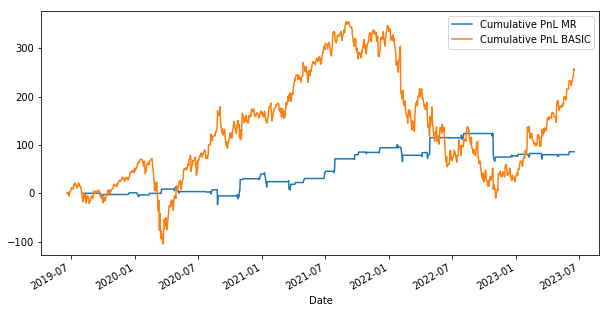

In [39]:
df.cumulative_pnl_MR.plot(label='Cumulative PnL MR',figsize=(10,5))
df.cumulative_pnl_BASIC.plot(label='Cumulative PnL BASIC',figsize=(10,5))
plt.legend()